# Proyek Analisis Data: Bike Sharing Dataset

###*  **Nama:** Apri Liana
###*  **Email:** m738b4kx0599@bangkit.academy
###*   **ID Dicoding:** Apri Liana M738B4KX0599



# Pertanyaan Bisnis

 1. Bagaimana tren jumlah penyewa sepeda per hari pada tahun 2011 hingga 2012?
 2. Bagaimana tren jumlah penyewa sepeda  per bulan pada tahun 2011 hingga 2012?
 3. Apakah perubahan musim memiliki pengaruh pada jumlah penyewaan sepeda?
 4. Apakah ada pengaruh hari libur pada jumlah penyewa sepeda?
 5. Apakah ada jam-jam tertentu dalam sehari yang memiliki tingkat penyewa sepeda lebih tinggi dibandingkan jam-jam lainnya?
 6. Kapan terakhir kali aktivitas sewa sepeda dilakukan dan berapa kali sepeda disewa dalam rentang waktu tersebut?




# Import Packages yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

### Load data days_df

In [3]:
days_df = pd.read_csv("https://raw.githubusercontent.com/prilian/python/refs/heads/main/day.csv")
days_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Load Data hours_dy

In [4]:
hours_df = pd.read_csv("https://raw.githubusercontent.com/prilian/python/refs/heads/main/hour.csv")
hours_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**

* Pada tahap ini dilakukan proses melihat data day dan hour  menggunakan function `read_csv()`. Poses ini penting dilakukan sebelum proses penilaian data (assessing data).



# Assessing Data

## Menilai Tabel `days_df`

In [5]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
days_df.nunique()

,0
instant,731
dteday,731
season,4
yr,2
mnth,12
holiday,2
weekday,7
workingday,2
weathersit,3
temp,499


In [7]:
print("Jumlah duplikasi: ",days_df.duplicated().sum())
days_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**


*   Pada tahap ini, dilakukan proses menilai data day. Dengan menggunakan function info() saya dapat melihat jumlah kolom, jumlah missing value, dan tipe data yang ada pada data.
*   Dari proses tersebut, tidak ditemukan missing value, duplicate ataupun inacurate data.



### Menilai data `hours_df`

In [8]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [9]:
hours_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [10]:
print("Jumlah duplikasi: ", hours_df.duplicated().sum())
hours_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**


*   Pada tahap ini, dilakukan proses menilai data hour. Ditemukan kesalahan tipe data pada field dteday yang seharusnya bertipe datetime bukan object, kesalahan ini kemungkinan disebabkan karena human error.

*   Tidak ditemukan masalah lain seperti nilai yang hilan (missing value), duplikasi data ataupun inkonsistensi data.





# Cleaning data

## Cleaning data `days_df`

In [11]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  days_df[column] = pd.to_datetime(days_df[column])

In [13]:
days_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [14]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**


*   Pada tahap ini, tidak dilakukan proses cleaning pada dataset **'day'**, karena setelah dilakukan pengecekan lebih lanjut, tidak ditemukan data yang perlu dibersihkan. Dataset ini sudah berada dalam kondisi yang layak untuk dianalisis tanpa adanya nilai yang hilang (missing values), duplikasi data, atau inkonsistensi lain yang biasanya memerlukan tindakan pembersihan data.



## cleaning data `hours_df`

In [15]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Memperbaiki tipe data dteday

In [16]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

In [17]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [18]:
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Insight:**


* Pada tahap ini, dilakukan proses cleaning data untuk merubah tipe data pada kolom dteday yang awalnya objek menjadi datetime. Konversi data menjadi datetime dilakukan untuk memudahkan analisis data terkait tanggal.




# Esploratory Data Analysis (EDA)

## Eksploratory data `days_df`

In [19]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [20]:
# Mengelompokkan data berdasarkan bulan dan tahun
monthly_rentals = days_df.groupby(by=["mnth", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

# Mengganti nilai bulan dengan nama bulan yang sesuai (Januari-Desember)
monthly_rentals['mnth'] = monthly_rentals['mnth'].apply(lambda x:
    {1: 'January', 2: 'February', 3: 'March', 4: 'April',
     5: 'May', 6: 'June', 7: 'July', 8: 'August',
     9: 'September', 10: 'October', 11: 'November', 12: 'December'}.get(x, x))

monthly_rentals['yr'] = monthly_rentals['yr'].apply(lambda x: 2011 if x == 0 else 2012)

month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4,
                'May': 5, 'June': 6, 'July': 7, 'August': 8,
                'September': 9, 'October': 10, 'November': 11, 'December': 12}
# Menambahkan kolom urutan bulan
monthly_rentals['mnth_order'] = monthly_rentals['mnth'].map(month_order)
monthly_rentals = monthly_rentals.sort_values(by=['yr', 'mnth_order']).reset_index(drop=True)

monthly_rentals = monthly_rentals.drop(columns=['mnth_order'])
monthly_rentals

,mnth,yr,cnt
0,January,2011,38189
1,February,2011,48215
2,March,2011,64045
3,April,2011,94870
4,May,2011,135821
5,June,2011,143512
6,July,2011,141341
7,August,2011,136691
8,September,2011,127418
9,October,2011,123511


In [21]:
weather_2012_df = days_df[days_df['yr'] == 1]

monthly_weather = weather_2012_df.groupby(by="mnth").agg({
    "windspeed": "mean",
    "weathersit": lambda x: x.mode()[0]
}).reset_index()

# Mengganti nilai cuaca menjadi teks
weather_mapping = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
monthly_weather['weathersit'] = monthly_weather['weathersit'].map(weather_mapping)

# Mengganti nilai bulan
monthly_weather['mnth'] = monthly_weather['mnth'].apply(lambda x:
    {1: 'January', 2: 'February', 3: 'March', 4: 'April',
     5: 'May', 6: 'June', 7: 'July', 8: 'August',
     9: 'September', 10: 'October', 11: 'November', 12: 'December'}.get(x, x))

monthly_weather

,mnth,windspeed,weathersit
0,January,0.217187,Clear
1,February,0.203244,Clear
2,March,0.212991,Clear
3,April,0.224748,Clear
4,May,0.184704,Clear
5,June,0.192644,Clear
6,July,0.160450,Clear
7,August,0.155116,Clear
8,September,0.178901,Clear
9,October,0.174725,Mist/Cloudy


In [22]:
season_rentals = days_df.groupby(by=["season"]).agg({
    "cnt": "sum"
}).reset_index()

# Mengubah angka musim menjadi teks
season_rentals['season'] = season_rentals['season'].apply(lambda x:
    {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}.get(x, x))

# Melihat hasil
season_rentals


,season,cnt
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


### Explore hours_df

In [23]:
hours_df.describe()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [24]:
hours_df.columns.tolist()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [25]:
def categorize_day(row):
    if row["holiday"] == 1:
        return "Holiday"
    elif row["workingday"] == 1:
        return "Working Day"
    elif row["weekday"] >= 5:
        return "Weekend"
    else:
        return "Weekday"

hours_df["day_type"] = hours_df.apply(categorize_day, axis=1)

# Menghitung jumlah persewaan berdasarkan kategori hari
#result = hours_df.groupby(by="day_type")["cnt"].sum().reset_index()
result = hours_df.groupby(by="day_type")["cnt"].sum().reset_index()
result_sorted = result.sort_values(by="cnt", ascending=False).reset_index(drop=True)
result_sorted

,day_type,cnt
0,Working Day,2292410
1,Weekend,477807
2,Weekday,444027
3,Holiday,78435


In [26]:
# Mengelompokkan data berdasarkan jam dan menghitung rata-rata persewaan
hourly_rentals = hours_df.groupby(by="hr").agg({
    "cnt": "mean"  # Rata-rata persewaan per jam
}).reset_index()
hourly_rentals

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


In [27]:
hourly_rentals_with_weather = hours_df.groupby(by=["hr", "weathersit"]).agg({
    "cnt": "mean",
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean"
}).reset_index()

# Mapping kondisi cuaca menjadi deskriptif
weather_mapping = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
hourly_rentals_with_weather['weathersit'] = hourly_rentals_with_weather['weathersit'].map(weather_mapping)

hourly_rentals_with_weather

,hr,weathersit,cnt,temp,hum,windspeed
0,0,Clear,59.161554,0.475624,0.657382,0.159759
1,0,Mist/Cloudy,47.232432,0.451784,0.739459,0.155470
2,0,Light Snow/Rain,28.115385,0.445769,0.835000,0.202935
3,1,Clear,34.395918,0.466204,0.669980,0.153036
4,1,Mist/Cloudy,35.541899,0.447263,0.756145,0.158598
...,...,...,...,...,...,...
70,22,Mist/Cloudy,116.823171,0.463415,0.718537,0.178567
71,22,Light Snow/Rain,70.345455,0.454182,0.860000,0.212485
72,23,Clear,93.981707,0.478821,0.632988,0.163550
73,23,Mist/Cloudy,85.171598,0.467574,0.728047,0.159153


### **Insight:**


*  Dapat dilihat pola musiman yang mempengaruhi jumlah peminjaman sepeda. Ada bulan-bulan tertentu yang menunjukan kenaikan dan penurunan. Peningkatan terjadi pada bulan-bulan musim semi dan musim panas (April hingga Agustus) dan penurunan selama musim dingin (November hingga Februari).
*   Dari data bisa dilihat perbandingan tren dari tahun 2011 ke 2012. Terdapat jumlah kenaikan dan penurunan secara signifikan, hal itu bisa menunjukkan faktor eksternal seperti perubahan kebijakan, cuaca ekstrem, atau faktor ekonomi.


In [28]:
hours_df.to_csv('main.csv', index=False)

# Visualization & Explanatory Analysis

### Bagaimana tren jumlah penyewa sepeda per bulan pada tahun 2011 dan 2012?

In [29]:
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
# Mengelompokkan data berdasarkan bulan dan tahun
monthly_rentals = days_df.groupby(by=["mnth", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

# Mengganti nilai bulan dengan nama bulan yang sesuai (Januari-Desember)
monthly_rentals['mnth'] = monthly_rentals['mnth'].apply(lambda x:
    {1: 'January', 2: 'February', 3: 'March', 4: 'April',
     5: 'May', 6: 'June', 7: 'July', 8: 'August',
     9: 'September', 10: 'October', 11: 'November', 12: 'December'}.get(x, x))

monthly_rentals['yr'] = monthly_rentals['yr'].apply(lambda x: 2011 if x == 0 else 2012)

month_order = {'January': 1, 'February': 2, 'March': 3, 'April': 4,
                'May': 5, 'June': 6, 'July': 7, 'August': 8,
                'September': 9, 'October': 10, 'November': 11, 'December': 12}
# Menambahkan kolom urutan bulan
monthly_rentals['mnth_order'] = monthly_rentals['mnth'].map(month_order)
monthly_rentals = monthly_rentals.sort_values(by=['yr', 'mnth_order']).reset_index(drop=True)

monthly_rentals = monthly_rentals.drop(columns=['mnth_order'])
monthly_rentals

,mnth,yr,cnt
0,January,2011,38189
1,February,2011,48215
2,March,2011,64045
3,April,2011,94870
4,May,2011,135821
5,June,2011,143512
6,July,2011,141341
7,August,2011,136691
8,September,2011,127418
9,October,2011,123511


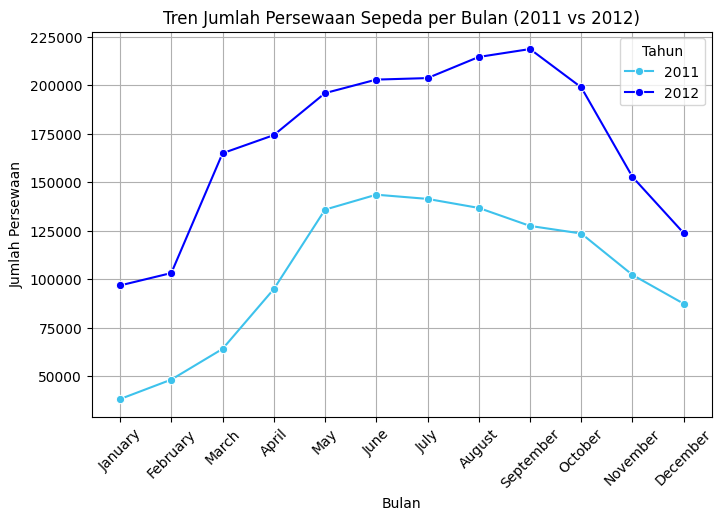

In [31]:
plt.figure(figsize=(8, 5))
custom_palette = sns.color_palette(["#3DC2EC", "b"])
sns.lineplot(data=monthly_rentals, x='mnth', y='cnt', hue='yr',marker='o', palette=custom_palette )
plt.title('Tren Jumlah Persewaan Sepeda per Bulan (2011 vs 2012)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Persewaan')
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Tahun')
plt.show()

**Insight**


*   Grafik menunjukan tren penyewaan sepeda per bulan dalam rentang waktu 2011 sampai 2012. Terlihat adanya peningkatan setiap bulan namun dapat dilihat juga jumlah penurunan yang cukup signifikan pada oktober 2012.

Apa yang menjadi penyebab terjadinya peningkatan jumlah sewa sepeda pada bulan september 2012 dan jumlah penurunan pada bulan oktober 2012? Apakah ada pengaruh dari kebijakan pemerintah, acara khusus atau pengaruh cuaca?



In [32]:
weather_2012_df = days_df[days_df['yr'] == 1]

monthly_weather = weather_2012_df.groupby(by="mnth").agg({
    "windspeed": "mean",
    "weathersit": lambda x: x.mode()[0]
}).reset_index()

# Mengganti nilai cuaca menjadi teks
weather_mapping = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
monthly_weather['weathersit'] = monthly_weather['weathersit'].map(weather_mapping)

# Mengganti nilai bulan
monthly_weather['mnth'] = monthly_weather['mnth'].apply(lambda x:
    {1: 'January', 2: 'February', 3: 'March', 4: 'April',
     5: 'May', 6: 'June', 7: 'July', 8: 'August',
     9: 'September', 10: 'October', 11: 'November', 12: 'December'}.get(x, x))

monthly_weather

,mnth,windspeed,weathersit
0,January,0.217187,Clear
1,February,0.203244,Clear
2,March,0.212991,Clear
3,April,0.224748,Clear
4,May,0.184704,Clear
5,June,0.192644,Clear
6,July,0.160450,Clear
7,August,0.155116,Clear
8,September,0.178901,Clear
9,October,0.174725,Mist/Cloudy


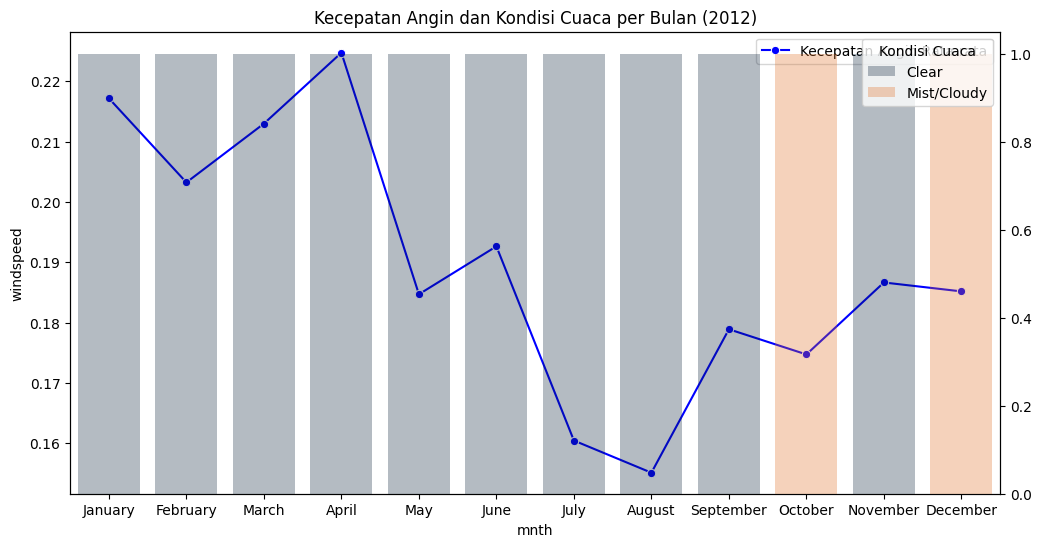

In [33]:
plt.figure(figsize=(12, 6))

# Plot kecepatan angin
sns.lineplot(data=monthly_weather, x='mnth', y='windspeed', marker='o', color='b', label='Kecepatan Angin Rata-rata')

# Buat sumbu kedua untuk kondisi cuaca
plt.twinx()
custom_palette = sns.color_palette(["#001F3F", "#FF6500"])
sns.countplot(data=monthly_weather, x='mnth', hue='weathersit', palette=custom_palette, alpha=0.3)
plt.title('Kecepatan Angin dan Kondisi Cuaca per Bulan (2012)')
plt.xlabel('Bulan')
plt.ylabel('')
plt.xticks(rotation=45)
plt.legend(title='Kondisi Cuaca')
plt.show()

**Insight:**

 Penyebab terjadinya lonjokan kenaikan pada september 2012 disebabkan karena beberapa faktor. Diantaranya:
 * Adanya acara 17th Street Art Festival yang mengundang banyak wisatawan untuk berkunjung.
    https://www.flickr.com/photos/borderstan/albums/72157631598690472/
 * Jika dilihat dari faktor cuaca, pada bulan juli-september merupakan hari yang cerah dengan kecepatan angin yang relatif rendah sehingga menjadi salah satu faktor orang-orang nyaman beraktivitas di luar ruangan.
 * selain kenaikan, pada diagram terilhat jumlah penurunan sewa sepeda yang cukup signifikan pada bulan oktober. Melalui BBC dilaporkan adanya badai sandy dengan kecepatan angin sekitar 129km/jam yang menyebabkan kelumpuhan aktivitas masyarakat. Pada diagram menunjukan pada oktober memiliki cuaca yang berawan dan kecepatan angin rata-rata 0.174.
https://www.bbc.com/indonesia/dunia/2012/10/121030_sandy_landfall

### Apakah perubahan musim memiliki pengaruh pada jumlah penyewaan sepeda?

In [34]:
season_rentals = days_df.groupby(by=["season"]).agg({
    "cnt": "sum"
}).reset_index()

# Mengubah angka musim menjadi teks
season_rentals['season'] = season_rentals['season'].apply(lambda x:
    {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}.get(x, x))

# Melihat hasil
season_rentals


,season,cnt
0,Spring,471348
1,Summer,918589
2,Fall,1061129
3,Winter,841613


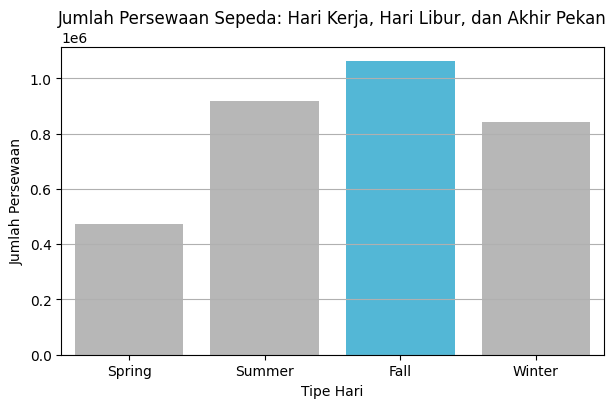

In [35]:
plt.figure(figsize=(7, 4))
custom_palette = sns.color_palette(["#B7B7B7", "#B7B7B7", "#3DC2EC", "#B7B7B7"])
sns.barplot(x="season", y="cnt", hue="season", data=season_rentals, palette=custom_palette)
plt.title("Jumlah Persewaan Sepeda: Hari Kerja, Hari Libur, dan Akhir Pekan")
plt.xlabel("Tipe Hari")
plt.ylabel("Jumlah Persewaan")
plt.grid(axis="y")
plt.show()

**Insight:**


*   Grafik menunjukan season atau musim mempengaruhi jumlah penyewa sepeda. Banyak masyarakat yang lebih menyukai musim gugur untuk melakukan aktivitas di luar ruangan seperti bersepeda. Hal ini bisa disebabkan karena faktor cuaca yang cerah.




### Apakah ada pengaruh hari libur dan hari kerja pada jumlah penyewa sepeda?

In [36]:
hours_df.columns.tolist()

['instant',
 'dteday',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt',
 'day_type']

In [56]:
def categorize_day(row):
    if row["holiday"] == 1:
        return "Holiday"
    elif row["weekday"] == 0 or row["weekday"] == 6:  # 0 is Sunday, 6 is Saturday
        return "Weekend"
    else:
        return "Weekday"

# Terapkan fungsi kategori pada dataset
hours_df["day_type"] = hours_df.apply(categorize_day, axis=1)

# Menghitung jumlah persewaan berdasarkan kategori hari
result = hours_df.groupby(by="day_type")["cnt"].sum().reset_index()

# Mengurutkan hasil berdasarkan jumlah penyewaan
result_sorted = result.sort_values(by="cnt", ascending=False).reset_index(drop=True)
result_sorted

,day_type,cnt
0,Weekday,2292410
1,Weekend,921834
2,Holiday,78435


<ipython-input-57-f15f9680c782>:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.barplot(x="day_type", y="cnt", hue="day_type", data=result_sorted, palette=custom_palette)


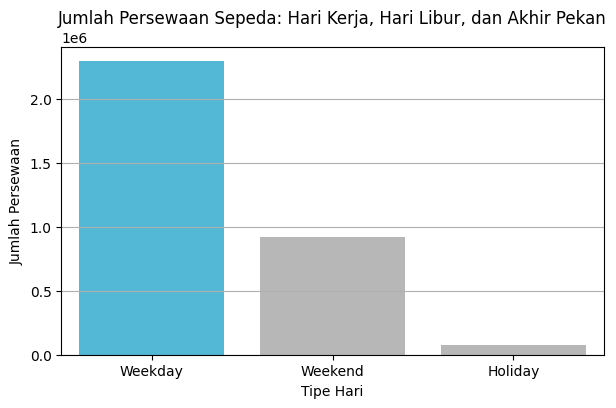

In [57]:
plt.figure(figsize=(7, 4))
custom_palette = sns.color_palette(["#3DC2EC", "#B7B7B7", "#B7B7B7", "#B7B7B7"])
sns.barplot(x="day_type", y="cnt", hue="day_type", data=result_sorted, palette=custom_palette)
plt.title("Jumlah Persewaan Sepeda: Hari Kerja, Hari Libur, dan Akhir Pekan")
plt.xlabel("Tipe Hari")
plt.ylabel("Jumlah Persewaan")
plt.grid(axis="y")
plt.show()

**Insight:**
1. Berdasarkan data yang ditampilkan pada grafik, jumlah penyewa sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur. Hal ini bisa disebabkan karena beberapa faktor, diantaranya:
    * Pada tahun 2011, pemerintah Washington DC meluncurkan kebijakan "Bike to Work Day," sebuah inisiatif tahunan yang dirancang untuk mempromosikan penggunaan sepeda sebagai moda transportasi utama menuju tempat kerja. Kebijakan ini memberikan dampak jangka panjang, dengan peningkatan signifikan dalam penggunaan sepeda untuk perjalanan harian, terutama di kalangan pekerja komuter.
    * Kenaikan harga bensin yang tinggi serta sesaknya kereta bawah tanah menjadi salah satu alasan masyarakat lebih memilih menggunakan sepeda sebagai alat transportasi.
    https://www.voaindonesia.com/a/article-10-ribu-orang-bersepeda-ke-kantor-122349409/93473.html


### Apakah ada jam-jam tertentu dalam sehari yang memiliki tingkat penyewa sepeda lebih tinggi dibandingkan jam-jam lainnya?

In [40]:
# Mengelompokkan data berdasarkan jam dan menghitung rata-rata persewaan
hourly_rentals = hours_df.groupby(by="hr").agg({
    "cnt": "mean"  # Rata-rata persewaan per jam
}).reset_index()
hourly_rentals

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


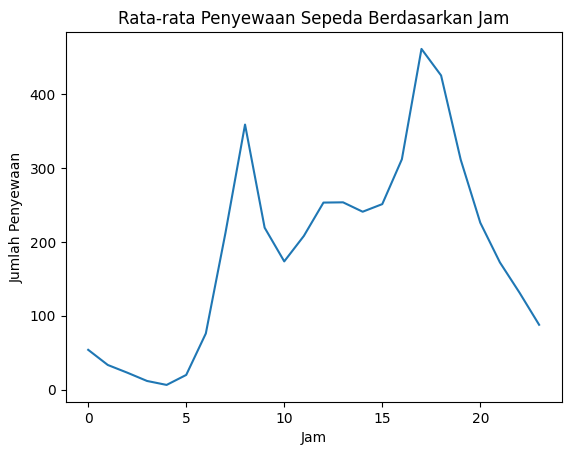

In [41]:
sns.lineplot(x='hr', y='cnt', data=hourly_rentals)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**


1.  Data menunjukkan adanya lonjakan signifikan dalam jumlah penyewa sepeda pada jam 8 pagi dan jam 5-6 sore. Peningkatan ini dipengaruhi oleh beberapa faktor yang saling berkaitan, diantaranya:
 Salah satu faktor utama adalah

*   kebijakan pemerintah, seperti inisiatif "Bike to Work Day," yang bertujuan mempromosikan penggunaan sepeda untuk perjalanan ke tempat kerja. Selain itu, meningkatnya biaya transportasi lain seperti bahan bakar atau tiket angkutan umum juga memotivasi banyak orang untuk beralih ke sepeda sebagai alternatif yang lebih ekonomis dan ramah lingkungan.
*   Pada sore hari, khususnya sekitar jam 5-6, jumlah penyewa sepeda kembali mengalami peningkatan yang lebih tinggi. Selain karena para pekerja pulang dari kantor, faktor cuaca juga memainkan peran penting. Pada jam-jam tersebut, cuaca cenderung lebih cerah dan nyaman, yang mendorong orang-orang untuk lebih banyak beraktivitas di luar ruangan.



In [42]:
hourly_rentals_with_weather = hours_df.groupby(by=["hr", "weathersit"]).agg({
    "cnt": "mean",
    "temp": "mean",
    "hum": "mean",
    "windspeed": "mean"
}).reset_index()

# Mapping kondisi cuaca menjadi deskriptif
weather_mapping = {1: 'Clear', 2: 'Mist/Cloudy', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
hourly_rentals_with_weather['weathersit'] = hourly_rentals_with_weather['weathersit'].map(weather_mapping)

hourly_rentals_with_weather

,hr,weathersit,cnt,temp,hum,windspeed
0,0,Clear,59.161554,0.475624,0.657382,0.159759
1,0,Mist/Cloudy,47.232432,0.451784,0.739459,0.155470
2,0,Light Snow/Rain,28.115385,0.445769,0.835000,0.202935
3,1,Clear,34.395918,0.466204,0.669980,0.153036
4,1,Mist/Cloudy,35.541899,0.447263,0.756145,0.158598
...,...,...,...,...,...,...
70,22,Mist/Cloudy,116.823171,0.463415,0.718537,0.178567
71,22,Light Snow/Rain,70.345455,0.454182,0.860000,0.212485
72,23,Clear,93.981707,0.478821,0.632988,0.163550
73,23,Mist/Cloudy,85.171598,0.467574,0.728047,0.159153


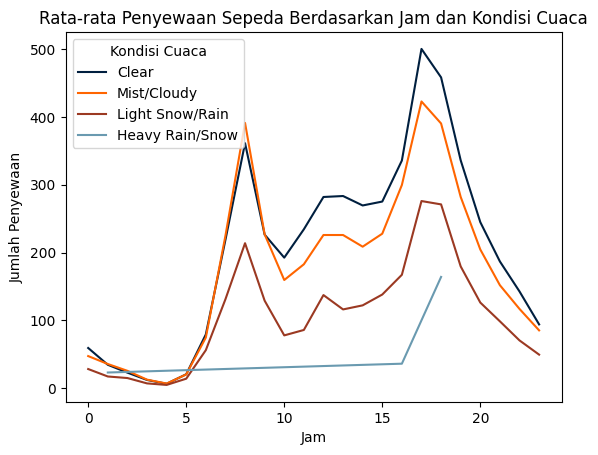

In [43]:
# Visualisasi pengaruh cuaca terhadap penyewaan sepeda per jam
custom_palette = sns.color_palette(["#001F3F", "#FF6500", "#9B3922", "#6A9AB0"])
sns.lineplot(x='hr', y='cnt', hue='weathersit', data=hourly_rentals_with_weather, palette=custom_palette)
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jam dan Kondisi Cuaca')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Kondisi Cuaca')
plt.show()

**Insight:**


*   Data menunjukan bahwa cuaca memiliki pengaruh signifikan terhadap jumlah penyewa sepeda, terutama ketika dilihat berdasarkan jam. Pada jam-jam tertentu, seperti di pagi hari dan sore hari, cuaca yang lebih cerah dan nyaman cenderung meningkatkan jumlah penyewa sepeda. Kondisi suhu yang tidak terlalu panas, angin yang sepoi-sepoi, dan langit cerah mendorong masyarakat untuk memilih bersepeda



# RFM Analysis



> Tambahkan blockquote


### Kapan terakhir kali aktivitas sewa sepeda dilakukan dan berapa kali sepeda disewa dalam rentang waktu tersebut?



In [44]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])

# Menghitung Recency
# Menghitung tanggal terakhir penyewaan
last_rental_date = days_df['dteday'].max()
# Menghitung recency
days_df['Recency'] = (last_rental_date - days_df['dteday']).dt.days

# Menghitung Frequency
# Menghitung jumlah penyewaan per hari
frequency_df = days_df.groupby('dteday').agg({'cnt': 'sum'}).reset_index()
frequency_df['Frequency'] = frequency_df['cnt']  # Set Frequency sama dengan jumlah penyewaan

# Menghitung Monetary
# Dianggap bahwa Monetary adalah jumlah total penyewaan
monetary_df = days_df.groupby('dteday').agg({'cnt': 'sum'}).reset_index()
monetary_df.rename(columns={'cnt': 'Monetary'}, inplace=True)

# Menggabungkan semua metrik
rfm_df = frequency_df[['dteday', 'Frequency']].merge(
    monetary_df[['dteday', 'Monetary']], on='dteday'
).merge(
    days_df[['dteday', 'Recency']], on='dteday', how='left'
).drop_duplicates()

# Memeriksa hasil RFM
print(rfm_df)

        dteday  Frequency  Monetary  Recency
0   2011-01-01        985       985      730
1   2011-01-02        801       801      729
2   2011-01-03       1349      1349      728
3   2011-01-04       1562      1562      727
4   2011-01-05       1600      1600      726
..         ...        ...       ...      ...
726 2012-12-27       2114      2114        4
727 2012-12-28       3095      3095        3
728 2012-12-29       1341      1341        2
729 2012-12-30       1796      1796        1
730 2012-12-31       2729      2729        0

[731 rows x 4 columns]


In [45]:
rfm_df.columns.tolist()

['dteday', 'Frequency', 'Monetary', 'Recency']

In [46]:
rfm_df = rfm_df.sort_values(by="Recency", ascending=True)
rfm_df.head()

,dteday,Frequency,Monetary,Recency
730,2012-12-31,2729,2729,0
729,2012-12-30,1796,1796,1
728,2012-12-29,1341,1341,2
727,2012-12-28,3095,3095,3
726,2012-12-27,2114,2114,4


In [47]:
rfm_df.sort_values(by="Frequency", ascending=False).head(5)

,dteday,Frequency,Monetary,Recency
623,2012-09-15,8714,8714,107
637,2012-09-29,8555,8555,93
630,2012-09-22,8395,8395,100
447,2012-03-23,8362,8362,283
504,2012-05-19,8294,8294,226


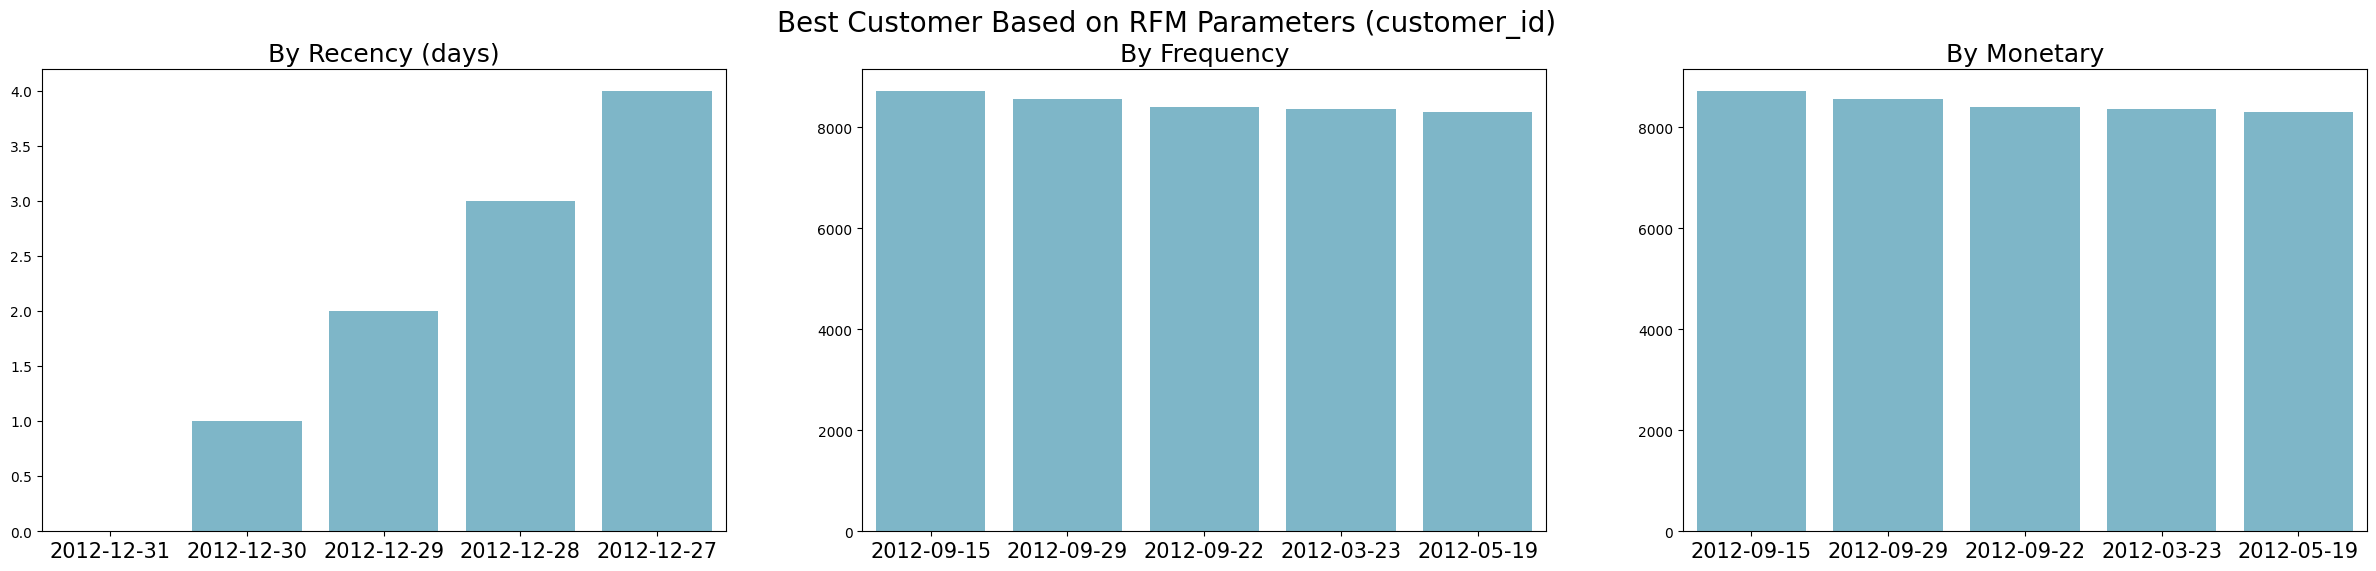

In [48]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="Recency", x="dteday", data=rfm_df.sort_values(by="Recency", ascending=True).head(5),hue="dteday", palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="Frequency", x="dteday", data=rfm_df.sort_values(by="Frequency", ascending=False).head(5),hue="dteday", palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="Monetary", x="dteday", data=rfm_df.sort_values(by="Monetary", ascending=False).head(5),hue="dteday", palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**


*  Aktivitas penyewaan sepeda yang terakhir dilakukan tercatat pada desember 2012. Ini menunjukkan bahwa pengguna sepeda memiliki kecenderungan untuk menyewa sepeda secara teratur hingga tahun tersebut.
* Grafik menunjukan berapa kali  sepeda disewa per bulan selama tahun 2012. Dengan menganalisis data bulanan, kita dapat mengidentifikasi tren penggunaan sepeda, seperti bulan-bulan dengan penyewaan tertinggi dan terendah. Hal ini membantu dalam merencanakan strategi pemasaran dan pengelolaan armada sepeda, serta memahami preferensi pengguna berdasarkan waktu.





### Mengidentifikasi berapa kali pengguna casula dan registred melakukan sewa sepeda per hari pada tahun 2012.

      dteday  casual  registered  Total_Rentals
0 2012-01-01     686        1608           2294
1 2012-01-02     244        1707           1951
2 2012-01-03      89        2147           2236
3 2012-01-04      95        2273           2368
4 2012-01-05     140        3132           3272


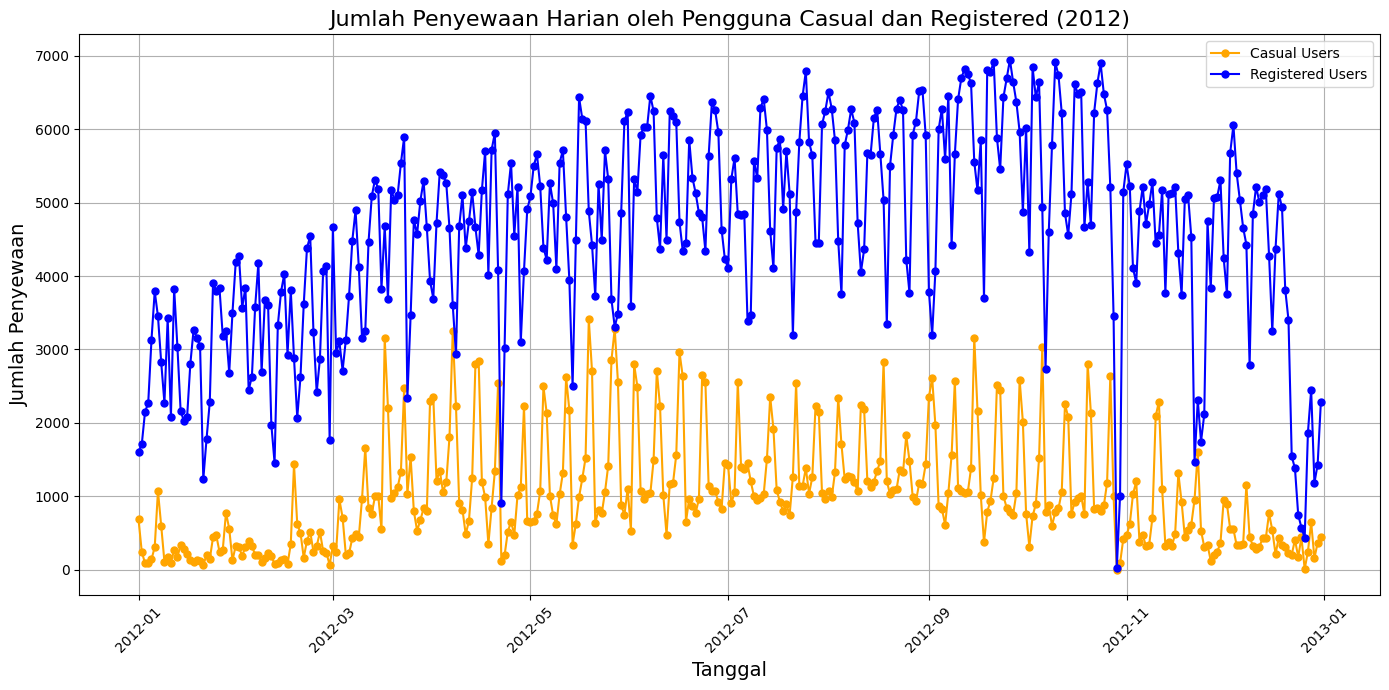

In [49]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])

# Filter untuk tahun 2012
days_2012 = days_df[days_df['dteday'].dt.year == 2012]

# Menghitung penyewaan harian berdasarkan tipe pengguna
daily_rentals = days_2012.groupby('dteday').agg({
    'casual': 'sum',
    'registered': 'sum',
}).reset_index()

# Menambahkan kolom untuk total penyewaan
daily_rentals['Total_Rentals'] = daily_rentals['casual'] + daily_rentals['registered']

print(daily_rentals.head())

# Visualisasi penyewaan harian
plt.figure(figsize=(14, 7))
plt.plot(daily_rentals['dteday'], daily_rentals['casual'], label='Casual Users', color='orange', marker='o', markersize=5)
plt.plot(daily_rentals['dteday'], daily_rentals['registered'], label='Registered Users', color='blue', marker='o', markersize=5)
plt.title('Jumlah Penyewaan Harian oleh Pengguna Casual dan Registered (2012)', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Jumlah Penyewaan', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

**Insight:**


*   Pengguna registered lebih banyak melakukan sewa per hari pada tahun 2012. Perusahaan dapat menggunakan grafik ini sebaai pertimbangan untuk memberikan bonus atau diskon agar pelanggan registered selalu melakukan sewa.



    User_Type  Total_Rentals
0      Casual        3292679
1  Registered        3292679


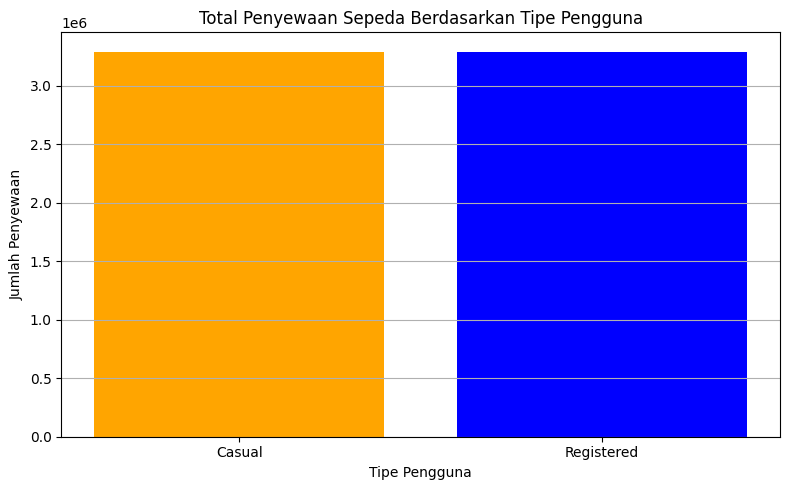

In [50]:
monetary_df = days_df.groupby(['dteday']).agg({
    'casual': 'sum',
    'registered': 'sum',
    'cnt': 'sum'  # Jumlah penyewaan total
}).reset_index()

# Menghitung total monetary untuk masing-masing tipe pengguna
monetary_summary = pd.DataFrame({
    'User_Type': ['Casual', 'Registered'],
    'Total_Rentals': [
        monetary_df['cnt'][days_df['casual'] > 0].sum(),  # Total penyewaan untuk casual
        monetary_df['cnt'][days_df['registered'] > 0].sum()  # Total penyewaan untuk registered
    ]
})

# Menampilkan ringkasan monetary
print(monetary_summary)

# Visualisasi Total Penyewaan Berdasarkan Tipe Pengguna
plt.figure(figsize=(8, 5))
plt.bar(monetary_summary['User_Type'], monetary_summary['Total_Rentals'], color=['orange', 'blue'])
plt.title('Total Penyewaan Sepeda Berdasarkan Tipe Pengguna')
plt.xlabel('Tipe Pengguna')
plt.ylabel('Jumlah Penyewaan')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**Insight:**


*  Grafik menunjukkan bahwa penyewa sepeda yang sudah terdaftar (registered) dan penyewa kasual (casual) memiliki jumlah sewa yang sama selama rentang waktu 2011 dan 2012. Hal ini mengindikasikan bahwa terdapat keseimbangan dalam penggunaan layanan sepeda, yang dapat menjadi peluang bagi perusahaan untuk merancang strategi pemasaran yang lebih efektif.



